In [1]:
# GATHER DATA FROM OPENML AND SPLIT THEM INTO THE FEATURES AND LABELS

from sklearn.datasets import fetch_openml

mnsit = fetch_openml('mnist_784', version=1, as_frame=False)
mnsit.keys()



dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,Y = mnsit['data'], mnsit['target']

(-0.5, 27.5, 27.5, -0.5)

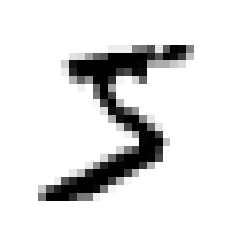

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

some_digit =X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')

In [4]:
Y[0]

'5'

In [5]:
import numpy as np
import pandas as pd
Y = Y.astype(np.uint8)

In [6]:
#CREATE TRAIN TEST SETS AND LEAVE IT ASIDE!

X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [7]:
#Starting off with a Binary Classifier ; To check if a given digit is a 5 or not a 5!

Y_train_5 = (Y_train==5)
Y_test_5 = (Y_test==5)

from sklearn.linear_model import SGDClassifier

SGD_clf = SGDClassifier(random_state =42)
SGD_clf.fit(X_train,Y_train_5)


SGDClassifier(random_state=42)

In [8]:
SGD_clf.predict([some_digit])

array([ True])

In [9]:
#Evaluation Using cross_val_score

from sklearn.model_selection import cross_val_score

score_array = cross_val_score(SGD_clf, X_train,Y_train_5, cv =3, scoring ='accuracy')

In [10]:
score_array
# Great Numbers? But there might be a possibility that the data is skewed? Hence accuracy isn't the best measure!

array([0.95035, 0.96035, 0.9604 ])

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(SGD_clf, X_train,Y_train_5, cv =3)

In [12]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [13]:
#Calculate precision and recall

from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(Y_train_5, y_train_pred) # True Positive / (True Positive + False Positive)

0.8370879772350012

In [14]:
recall_score(Y_train_5, y_train_pred) # True Positive / (True Positive + False Negative)

0.6511713705958311

In [15]:
f1_score(Y_train_5, y_train_pred) # True Postive/True Positive + (False Negative+False Positive)/2

0.7325171197343846

In [16]:
#Since precision and recall are inversely proportional, based on the threshold , increasing it will increase precision and decrease
#recall and vice versa!

y_scores = cross_val_predict(SGD_clf, X_train,Y_train_5, cv =3, method ='decision_function')

In [17]:
# To compute the precision and recall for all the possible thresholds!
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_train_5, y_scores)

In [18]:
def plot_precision_recall_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
    

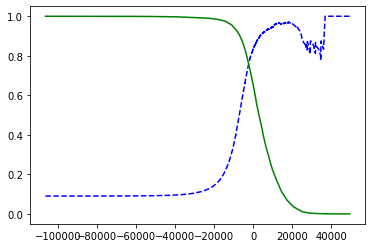

In [19]:
plot_precision_recall_threshold(precisions, recalls, thresholds)
plt.show()

Text(0, 0.5, 'Precision')

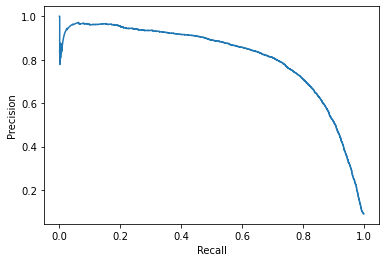

In [20]:
# To check where to do a trade off to avoid extremely low precision and recall - at before 

plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [21]:
# Plotting the ROC 

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_train_5, y_scores)

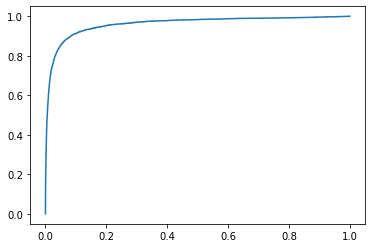

In [22]:
plt.plot(fpr, tpr)

In [23]:
# Now calculAting the AUC!

from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train_5, y_scores)



0.9604938554008616

In [24]:
# Lets Try with Random Forest

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state =42)

y_probas_forest= cross_val_predict(forest_clf,  X_train,Y_train_5, cv =3, method ='predict_proba')

In [25]:
y_scores_forest = y_probas_forest[:,1]

In [26]:
fpr_forest,tpr_forest, forest_thresholds = roc_curve(Y_train_5,y_scores_forest)

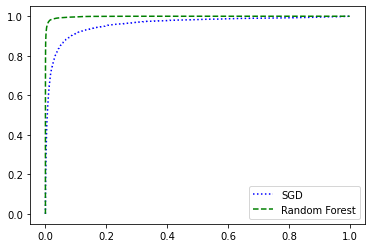

In [27]:
plt.plot(fpr,tpr , 'b:', label ='SGD')
plt.plot(fpr_forest,tpr_forest, 'g--', label ='Random Forest')
plt.plot()
plt.legend(loc ='lower right')
plt.show()

#Shows that randomforest is better since AUC closer to 1!

In [28]:
roc_auc_score(Y_train_5,y_scores_forest)

0.9983436731328145

In [29]:
y_pred_fprest = cross_val_predict(forest_clf, X_train,Y_train_5, cv =3)

In [31]:
precision_score(Y_train_5,y_pred_fprest)

0.9905083315756169

In [32]:
recall_score(Y_train_5,y_pred_fprest)

0.8662608374838591

In [33]:
# MULTICLASS CLASSIFICATION

from sklearn.svm import SVC

svm_clf = SVC( random_state =42)
svm_clf.fit(X_train,Y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [34]:

some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [36]:
# Try with the SGD Classifier and run cross_val_score to test accuracy!
SGD_clf.fit(X_train,Y_train)
SGD_clf.predict([some_digit])

array([3], dtype=uint8)

In [37]:
cross_val_score(SGD_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [38]:
# Scale th inputs and then check accuracy to see for improvement

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(SGD_clf, X_train_scaled, Y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [39]:
y_train_pred = cross_val_predict(SGD_clf, X_train_scaled, Y_train, cv=3)

conf_mx = confusion_matrix(Y_train,y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

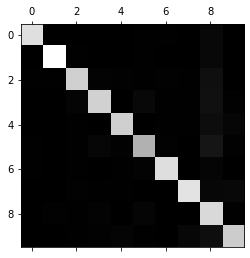

In [40]:
plt.matshow(conf_mx, cmap= plt.cm.gray)

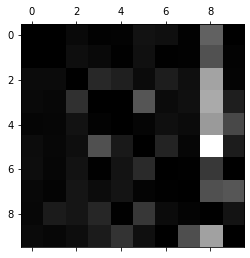

In [41]:
conf_row_sum = conf_mx.sum(axis= 1, keepdims=True)
norm_conf_mx = conf_mx/conf_row_sum

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)


In [42]:
# This shows that a lot of images are accidentally classified as 8. But 8 as such 
# isn't wrongly classified. 3 and 5s are often confused!



In [43]:
###################################################END############################################################